# Data Science - IBM Coursera Capstone Project 

#### Author Name: Hue Dinh - Data Science Student

# Car Accident Severity Analysis and Prediction with Logistic Regression

### 1. Introduction

#### Background:


Cars accident is a crucial problem for all countries in the world. It annually makes over 26.000 people die or seriously injured in Great Britain alone (reported in 2018). It indeed brings along numerous social and personal consequences. Car accidents casualties are various, controllable and uncontrollable. Therefore, an accurate analysis prediction model is necessary to help drivers and lawmakers to have awareness in particular situations so that severity will be minimised. 
    
This project will focus on analysing accident data - The record of car accidents in the UK from 2005 to 2015, which include contributing factors to severity. I will focus on factors that authorities can be aware of, so depends on the particular situation in daily life, they will have appropriate action to minimise the loss due to car accidents - People and Objects. 
    
For example, authorities can look at weather conditions, day of the week, road conditions etc... at their local area to know the likely hood of severity car accidents can cause so that they will have better preparation on preventing that. Furthermore, this model can be used by drivers, so cautious will be raised in particular situations.
    
I will strongly avoid contributing factors due to the natural development of society, as the age of the driver, the gender of the driver, the engine capacity, or even the purpose of accidental trips. Because these things are out of control of authorities and even drivers. I will have a further explanation later on.


#### About the Dataset 


Data set will be used in this analysis are Accidents and Vehicle from Road Safety Data, provided by UK government. 
They can be found __[HERE](https://www.kaggle.com/silicon99/dft-accident-data)__ and fully explained __[HERE](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)__ . They recored accidents and vehicles in those accidents, including acidental scenes, conditions at site, vehicle details, etc... 


### 2. Data acquisition

In [1]:
# Importing neccessary libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set()
import math

%matplotlib inline

In [2]:
#Loading Data
accident = pd.read_csv('/Users/huedinh/Desktop/Accidents0515.csv', index_col='Accident_Index')
vehicle = pd.read_csv(r'/Users/huedinh/Desktop/Vehicles0515.csv', index_col='Accident_Index', error_bad_lines=False)

# Merging two data sets into one with inner join by index
df = pd.merge(vehicle, accident, how = 'inner', on = 'Accident_Index')
print(df.shape)
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(3004425, 52)


,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,0,0,1,1,1,0,0,1,1,E01002840


#### The raw dataset includes over 3 millions observations and 52 variables. This is relatively a large dataset. 

##### There are many vehicle types are recorded. To make the analysis more concentrated, and avoid over fitting the model, we will focus on the most variaty vehicle - car, which is labelled 9 in the variable Vehicle_Type. 

In [3]:
df = df[df.Vehicle_Type==9]

##### Our Target variable is Accident Severity, so let see how it distributes.

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


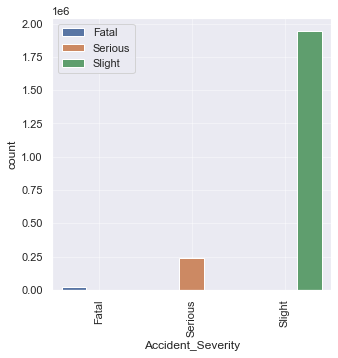

In [4]:
#Inspecting data by the distribution of the target variable
plt.figure(figsize=(5, 5))
ax=sns.countplot('Accident_Severity',hue='Accident_Severity',data=df)
ax.set_xticklabels(['Fatal','Serious','Slight'])
plt.xticks(rotation=90)
plt.legend(['Fatal','Serious','Slight'])
plt.grid(alpha=0.4)


####  Higly bias information

These factors below seem to have considerable participation in causing accidents. However, they are simply the natural result of social development. Such as people at the age of 30s and 40s are more likely to own and to use a car than the rest, urban areas are more density than rural areas, so more people drive, more accidents occurs. Therefore, we do not use these variables. 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


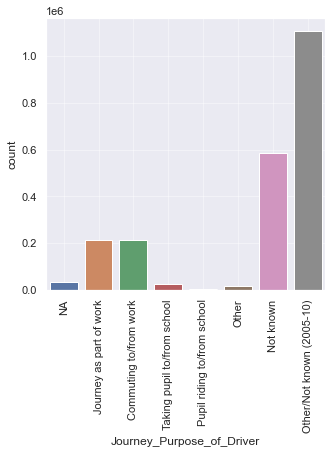

In [4]:
plt.figure(figsize=(5, 5))
ax=sns.countplot('Journey_Purpose_of_Driver',data=df)
ax.set_xticklabels(['NA','Journey as part of work','Commuting to/from work','Taking pupil to/from school', 'Pupil riding to/from school',
                   'Other', 'Not known', 'Other/Not known (2005-10)'])
plt.xticks(rotation=90)
plt.grid(alpha=0.4)

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


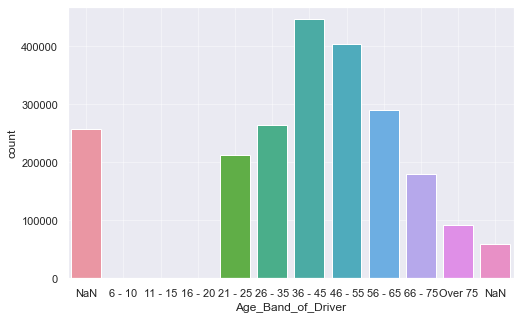

In [46]:
plt.figure(figsize=(8, 5))
bx=sns.countplot('Age_Band_of_Driver',data=df)
bx.set_xticklabels(['NaN', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', 
                                                              '36 - 45','46 - 55', '56 - 65', '66 - 75', 'Over 75', 'NaN'])
plt.grid(alpha=0.4)                   

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


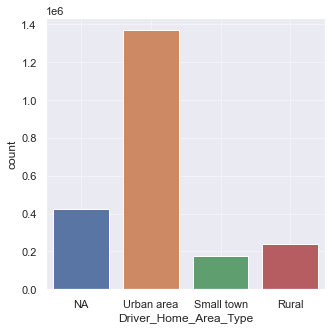

In [48]:
plt.figure(figsize=(5, 5))
cx=sns.countplot('Driver_Home_Area_Type',data=df)
cx.set_xticklabels(['NA','Urban area', 'Small town', 'Rural'])
plt.grid(alpha=0.4)  

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


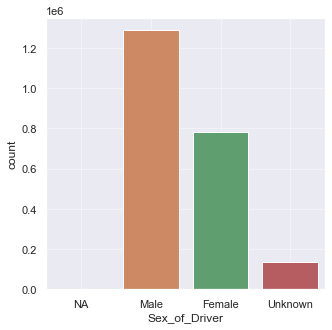

In [50]:
plt.figure(figsize=(5, 5))
dx=sns.countplot('Sex_of_Driver',data=df)
dx.set_xticklabels(['NA','Male', 'Female', 'Unknown'])
plt.grid(alpha=0.4) 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


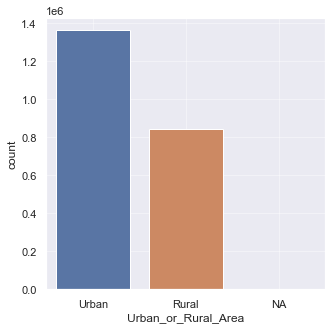

In [52]:
plt.figure(figsize=(5, 5))
ex=sns.countplot('Urban_or_Rural_Area',data=df)
ex.set_xticklabels(['Urban', 'Rural', 'NA'])
plt.grid(alpha=0.4)

####  Choosing variables for prediction

As mentioned in the introduction section, and the application of the analysis, we will focus on factors that authorities - our user - can be aware of beforehand, so that they can take proper actions to limit the damages. 
We will run the logistic regression model later so that choosing a small number of good variables will also avoid overfitting the model. 

We will be going to do further analysis with these variables. 

Vehicle_Manoeuvre, Junction_Location, Accident_Severity, Day_of_Week , Junction_Detail, Junction_Control, 
Light_Conditions, 
Weather_Conditions,
Road_Surface_Conditions, Special_Conditions_at_Site

In [5]:
# The dataframe includes variables for further analysis. 
df2 = df[['Vehicle_Manoeuvre', 'Junction_Location', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Accident_Severity']]
df2.head()

,Vehicle_Manoeuvre,Junction_Location,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Accident_Severity
Accident_Index,,,,,,,,,,,,
200501BS00001,18,0,3,6,30,0,-1,1,2,2,0,2
200501BS00003,2,0,5,6,30,0,-1,4,1,1,0,3
200501BS00004,18,0,6,6,30,0,-1,1,1,1,0,3
200501BS00006,5,0,3,6,30,0,-1,1,2,2,6,3
200501BS00007,2,1,5,6,30,3,4,4,1,1,0,3


<Figure size 432x288 with 0 Axes>

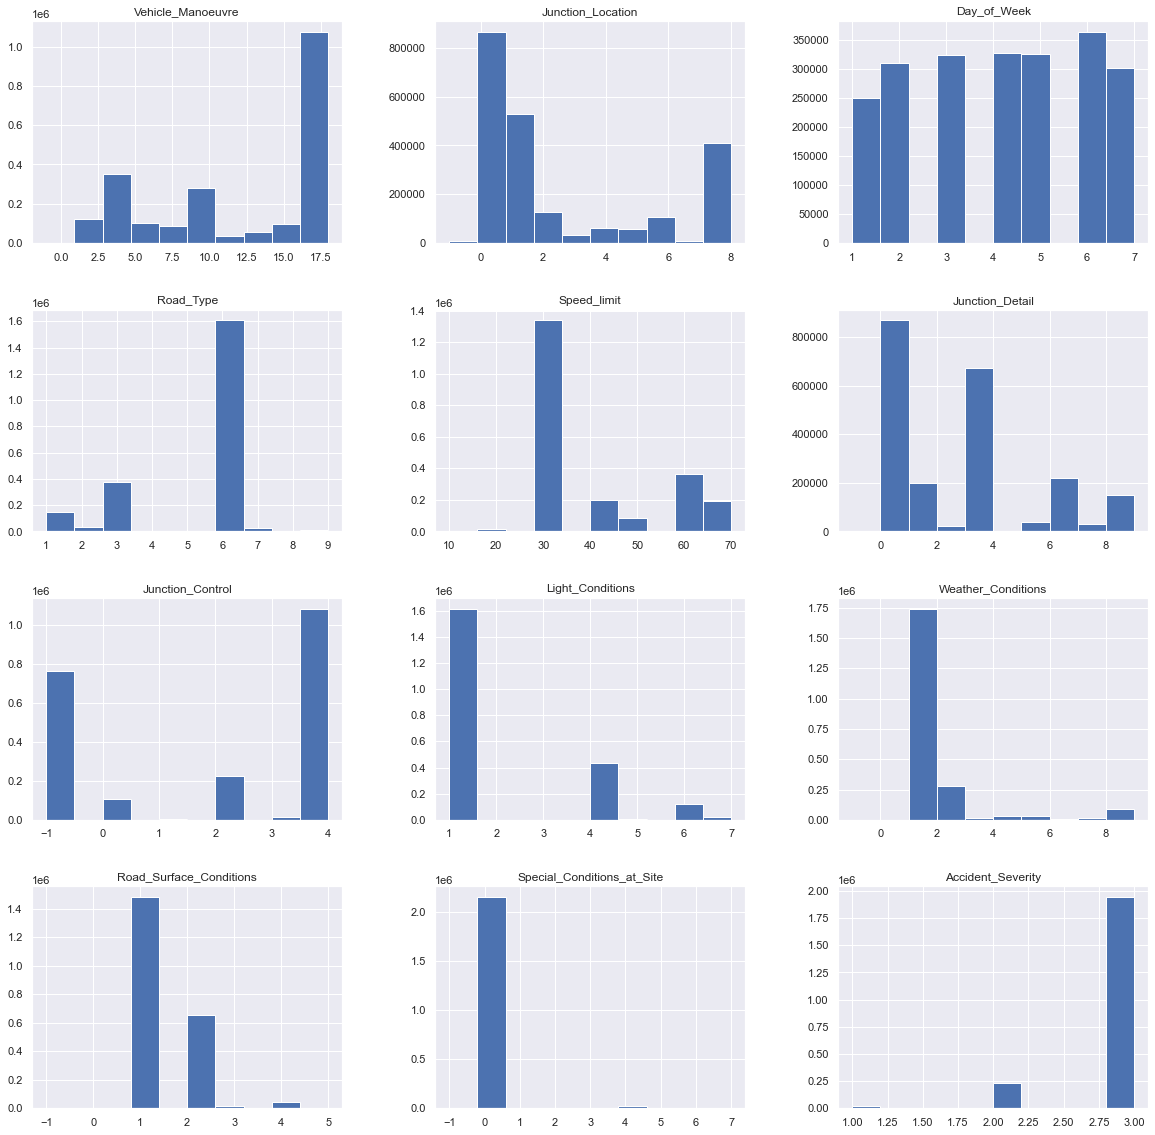

In [6]:
plt.figure()
df2.hist(figsize=(20,20));

### Data cleaning

The target variable is Accident Severity classed in 3 levels, Slight - 3, Serious - 2 and Fatal - 1. Geeting to fatal is an unwanted consequence, so extreme awareness should be from Serious level. Therefore, we will combine Serious and Fatal to 'Serious to Fatal' level. In the classification model, 0 represents Slight, and 1 represents for 'Serious to Fatal'. So we will transform the dataset. 

In [6]:
#From 3 to 2 classes, so that 0 = Slight, 1 = Serious to Fatal
df2['Accident_Severity'] = df2['Accident_Severity'].replace([2,3],[1,0])
df2.head()

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Vehicle_Manoeuvre,Junction_Location,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Accident_Severity
Accident_Index,,,,,,,,,,,,
200501BS00001,18,0,3,6,30,0,-1,1,2,2,0,1
200501BS00003,2,0,5,6,30,0,-1,4,1,1,0,0
200501BS00004,18,0,6,6,30,0,-1,1,1,1,0,0
200501BS00006,5,0,3,6,30,0,-1,1,2,2,6,0
200501BS00007,2,1,5,6,30,3,4,4,1,1,0,0


In [7]:
#Return the categorical value to the data frame - base on explaination of the dataset 
df2['Vehicle_Manoeuvre'] = df2['Vehicle_Manoeuvre'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, -1 ],
                                                 ['Reversing', 'Parked', 'Waiting to go - held up', 'Slowing or stopping', 'Moving off', 'U-turn',
                                                            'Turning left' , 'Waiting to turn left', 'Turning right', 'Waiting to turn right', 
                                                            'Changing lane to left', 'Changing lane to right', 'Overtaking moving vehicle - offside',
                                                            'Overtaking static vehicle - offside', 'Overtaking - nearside', 'Going ahead left-hand bend', 
                                                            'Going ahead right-hand bend', 'Going ahead other' , 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
df2['Junction_Location'] = df2['Junction_Location'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, -1],
                                                           ['Not at or within 20 metres of junction', 
                                                            'Approaching junction or waiting/parked at junction approach', 
                                                            'Cleared junction or waiting/parked at junction exit', 'Leaving roundabout', 
                                                            'Entering roundabout', 'Leaving main road','Entering main road', 'Entering from slip road', 
                                                            'Mid Junction - on roundabout or on main road', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df2['Day_of_Week'] = df2['Day_of_Week'].replace([1, 2, 3, 4, 5, 6, 7], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df2['Road_Type'] = df2['Road_Type'].replace([1, 2, 3, 6, 7, 9, 12, -1], 
                                            ['Roundabout', 'One way street', 'Dual carriageway', 
                                            'Single carriageway', 'Slip road', 'Others', 'One way street/Slip road', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df2['Speed_limit'] = df2['Speed_limit'].replace([20, 30, 40, 50, 60, 70, -1 ],
                                                ['20 MPH', '30 MPH', '40 MPH','50 MPH', '60 MPH', '70 MPH', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df2['Junction_Detail'] = df2['Junction_Detail'].replace([0, 1, 2, 3, 5, 6, 7, 8, 9, -1],
                                                        ['Not at junction or within 20 metres', 'Roundabout', 'Mini-roundabout', 
                                                         'T or staggered junction', 'Slip road', 'Crossroads', 'More than 4 arms (not roundabout)', 
                                                         'Private drive or entrance', 'Other junction', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
df2['Junction_Control'] = df2['Junction_Control'].replace([0, 1, 2, 3, 4, -1],
                                                          ['Not at junction or within 20 metres', 'Authorised person', 'Auto traffic signal', 'Stop sign', 
                                                           'Give way or uncontrolled', 'others'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df2['Light_Conditions'] = df2['Light_Conditions'].replace([1, 4, 5, 6, 7, -1],
                                                          ['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit', 
                                                           'Darkness - no lighting', 'Darkness - lighting unknown', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df2['Weather_Conditions'] = df2['Weather_Conditions'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, -1],
                                                              ['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds', 
                                                               'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Other', 'Unknown', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df2['Road_Surface_Conditions'] = df2['Road_Surface_Conditions'].replace([1, 2, 3, 4, 5,-1],
                                                                        ['Dry', 'Wet or damp', 'Snow', 'Frost or ice', 'Flood over 3cm. deep','NaN'])
                                                                        

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df2['Special_Conditions_at_Site'] = df2['Special_Conditions_at_Site'].replace([0, 1, 2, 3, 4, 5, 6, 7, -1],
                                                                              ['None', 'Auto traffic signal - out', 'Auto signal part defective', 'Road sign or marking defective or obscured', 
                                                                               'Roadworks', 'Road surface defective', 'Oil or diesel', 'Mud', 'NaN'])

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In the dataset, -1 values represents for missing values, as the dataset is large enough, so we can drop all missing values 

In [18]:
df2 = df2.dropna(axis = 0)
df2.shape

(2205201, 12)

### 3. Explortory Analysis 

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


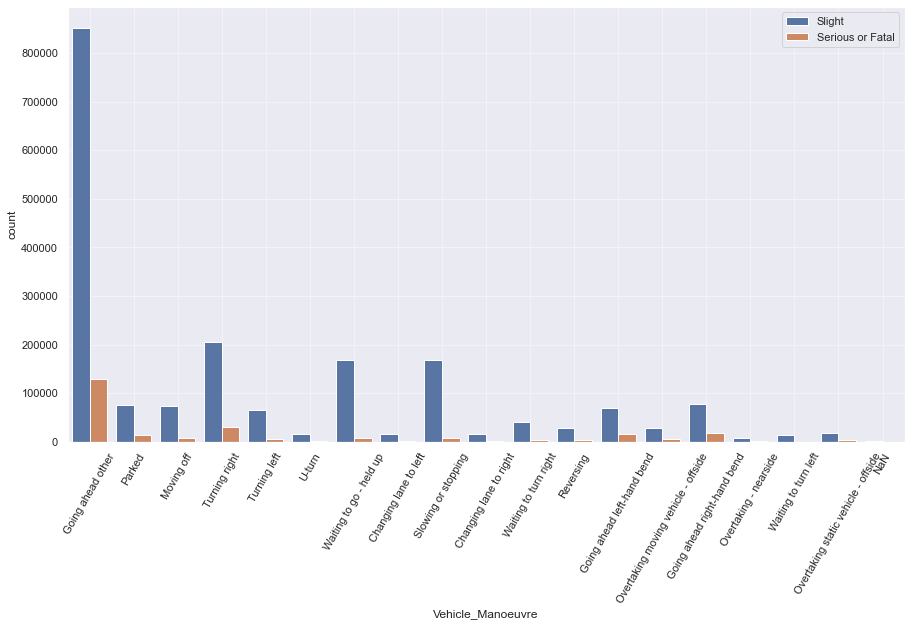

In [19]:
plt.figure(figsize=(15, 8))
ax=sns.countplot('Vehicle_Manoeuvre',hue='Accident_Severity',data=df2)
plt.xticks(rotation=60)
plt.legend(['Slight', 'Serious or Fatal'])
plt.grid(alpha=0.4)

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


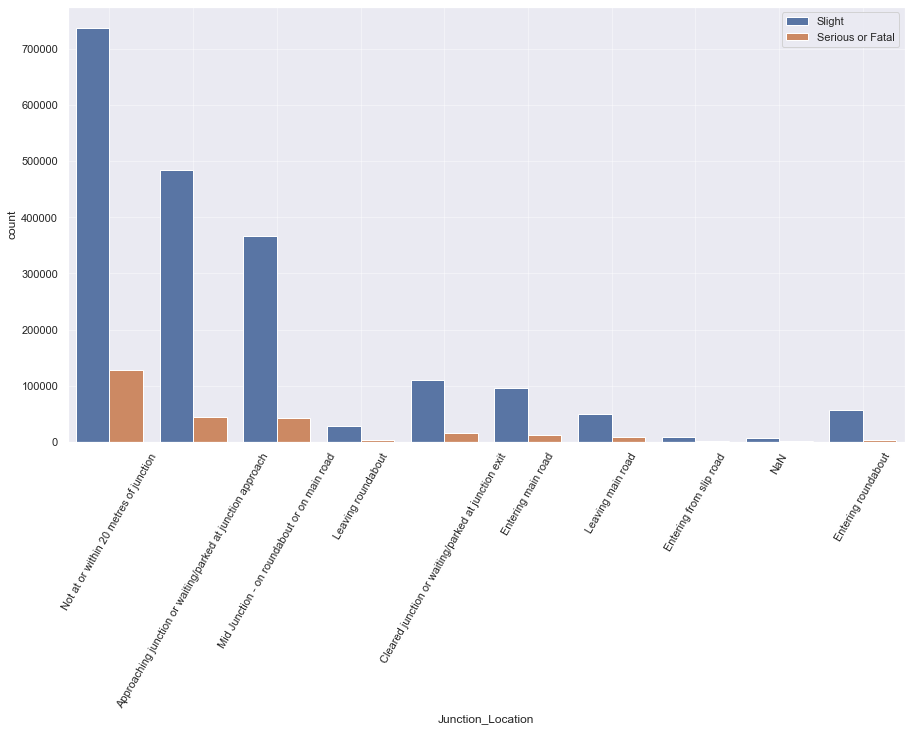

In [20]:
plt.figure(figsize=(15, 8))
ax=sns.countplot('Junction_Location',hue='Accident_Severity',data=df2)
plt.xticks(rotation=60)
plt.legend(['Slight', 'Serious or Fatal'])
plt.grid(alpha=0.4)

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


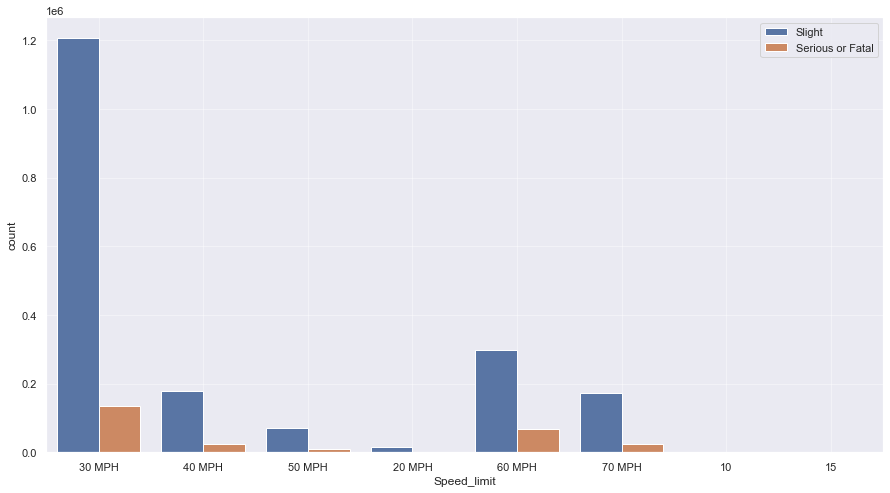

In [22]:
plt.figure(figsize=(15, 8))
ax=sns.countplot('Speed_limit',hue='Accident_Severity',data=df2)
plt.legend(['Slight', 'Serious or Fatal'])
plt.grid(alpha=0.4)

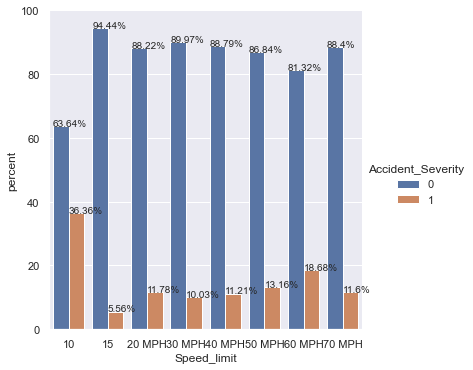

In [25]:
#Proportion of accident severity classes in each attribute of speed limit 
import numpy as np
import pandas as pd
import seaborn as sns

d = df2[['Speed_limit','Accident_Severity']]

x,y = 'Speed_limit','Accident_Severity'

df1 = d.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


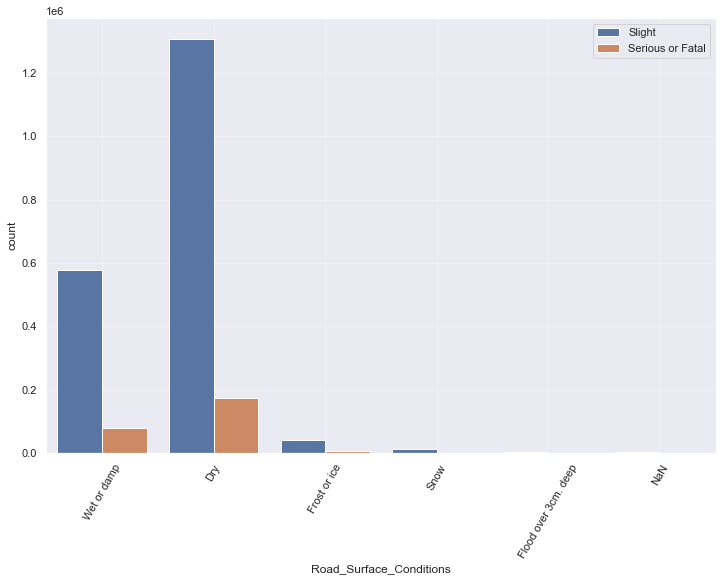

In [27]:
plt.figure(figsize=(12, 8))
ax=sns.countplot('Road_Surface_Conditions',hue='Accident_Severity',data=df2)
plt.xticks(rotation=60)
plt.legend(['Slight', 'Serious or Fatal'])
plt.grid(alpha=0.4)

### 4. Logistic Regression 

This model will be used for predicting the likelihood of particular conditions combination will cause accident severity to be 'Slight' or ' Serious to Fatal.

All Variables are categorical, we need to make them as dummies. 

In [29]:
#Making variables as dummies 
df2['Vehicle_Manoeuvre'] = df2['Vehicle_Manoeuvre'].astype('category')
df2['Junction_Location'] = df2['Junction_Location'].astype('category')
df2['Day_of_Week'] = df2['Day_of_Week'].astype('category')
df2['Road_Type'] = df2['Road_Type'].astype('category')
df2['Speed_limit'] = df2['Speed_limit'].astype('category')
df2['Junction_Detail'] = df2['Junction_Detail'].astype('category')
df2['Junction_Control'] =  df2['Junction_Control'].astype('category')
df2['Light_Conditions'] = df2['Light_Conditions'].astype('category')
df2['Weather_Conditions'] = df2['Weather_Conditions'].astype('category')
df2['Road_Surface_Conditions'] = df2['Road_Surface_Conditions'].astype('category')
df2['Special_Conditions_at_Site'] = df2['Special_Conditions_at_Site'].astype('category')
df3 =  pd.get_dummies(df2)

Spliting the dataset, we make extra proportion validation dataset for later identifying the identical threshold later.

In [30]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=101):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test
train, validate, test = train_validate_test_split(df3)
X_train = train.drop('Accident_Severity',1)
y_train = train['Accident_Severity']
X_validation = validate.drop('Accident_Severity',1)
y_validation = validate['Accident_Severity']
X_test = test.drop('Accident_Severity',1)
y_test = test['Accident_Severity']

Inspecting the distribution of Target Variable in the splited training dataset

/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


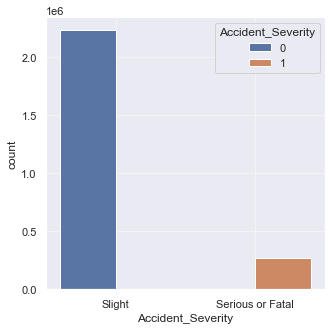

In [31]:
plt.figure(figsize=(5, 5))
ax=sns.countplot('Accident_Severity',hue='Accident_Severity',data=train)
ax.set_xticklabels(['Slight','Serious or Fatal'])
plt.grid(alpha=0.4)

Accident_Severity is heavily imbalanced to 'Slight' side, so we need to make the test-set to be more balanced. 
As the dataset is large enough, so we can use 30% sample to get the more optimal result of blancing. 

In [32]:
# Creating weights that are opposite to the weights of target
weights = np.where(train['Accident_Severity'] == 0, .2, .8)

#Sampling 30% of the data with new weights  
sample = train.sample(frac=0.3, replace=True, weights=weights)
print(sample.shape)

(749666, 97)


/Users/huedinh/venv36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


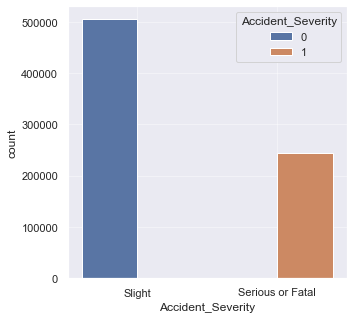

In [33]:
plt.figure(figsize=(5, 5))
ax=sns.countplot('Accident_Severity',hue='Accident_Severity',data=sample)
ax.set_xticklabels(['Slight','Serious or Fatal'])
plt.grid(alpha=0.4)

The new training datasets, which are blanced for further modelling

In [34]:
X_train = sample.drop('Accident_Severity',1)
y_train = sample['Accident_Severity']

In [35]:
# Building Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/Users/huedinh/venv36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of logistic regression classifier on test set: 0.85


In [36]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix

The default threshold in logistic regression is 0.5, we can look for the optimal one to make increase the accuracy of the model

In [38]:
fpr, tpr, thresholds = roc_curve(y_validation, logreg.predict_proba(X_validation)[:,1])
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
32211,0.374092,0.625891,0.625908,-0.000017,0.33


In [39]:
THRESHOLD = 0.62
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, preds)))

Accuracy: 0.93


The optimal threshold which bring the accuracy of the model to 93%

In [41]:
# The model report 
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    741951
           1       0.30      0.04      0.07     90318

    accuracy                           0.89    832269
   macro avg       0.60      0.52      0.51    832269
weighted avg       0.83      0.89      0.84    832269



Our average F1 score of the model is 84%!

### 5. Discussion 
As mentioned earlier, car accidents have many factors of causation, many of them starting from subjective factors of drivers, which is out of the authorities control, and even drivers control sometimes. However, from the authorities perspective, they want to try the best as they can to limit the consequences. Even the model is highly accurate in prediction, we still need to work on the operation parts to arrange workforce and requirements. 

This model heavily based on the hypothesis that the local authorities know well about their road accident severity problem, and each of them has a certain level of resources which fits along with the local social situation. 

When developing the model, I found out the optimal threshold is 0.62 (0.5 is the default of regression model), when I moved the threshold of the model to 0.62, the model had better accuracy. 

### 6. Conclusion

With the high accuracy of this model, it can be applied in real-life situations at local authorities in controlling traffic. In particular, they can base on the weather forecast, which is highly accurate nowadays, and local traffic conditions to: 

- Upgrade traffic Infrastructure if it's allowed
- Distribute workforce to 'hotspot' areas, day and time. 
- Have appropriate signs to raise awareness for drivers in high-risk conditions 
- And many more 

This analysis has focused on factors which can implement easily in daily basic, of any local authority. It also avoids bias information which is the nature of social development. 

Not only authorities but also people who join the traffic can implement this model to reduce the severity caused by car accidents. 
